In [5]:
import requests 
import pandas as pd
from bs4 import BeautifulSoup
import sqlite3
import matplotlib.pyplot as plt

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
#print(html_data)

In [4]:
result = BeautifulSoup(html_data,"html.parser")
#print(result)

In [7]:
tables = result.find_all("table")
#print(tables)

In [8]:
for index,table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        my_index = index
#print(my_index)

/tmp/ipykernel_5517/1092102824.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Date":Fecha, "Revenue":Ingreso}, ignore_index=True)
/tmp/ipykernel_5517/1092102824.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Date":Fecha, "Revenue":Ingreso}, ignore_index=True)
/tmp/ipykernel_5517/1092102824.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Date":Fecha, "Revenue":Ingreso}, ignore_index=True)
/tmp/ipykernel_5517/1092102824.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Date":Fecha, "Revenue":Ingreso}, ignore_index=True)
/tmp/ipykernel_5517/1092102824.py:8:

          Date Revenue
0   2022-03-31   18756
1   2021-12-31   17719
2   2021-09-30   13757
3   2021-06-30   11958
4   2021-03-31   10389
5   2020-12-31   10744
6   2020-09-30    8771
7   2020-06-30    6036
8   2020-03-31    5985
9   2019-12-31    7384
10  2019-09-30    6303
11  2019-06-30    6350
12  2019-03-31    4541
13  2018-12-31    7226
14  2018-09-30    6824
15  2018-06-30    4002
16  2018-03-31    3409
17  2017-12-31    3288
18  2017-09-30    2985
19  2017-06-30    2790
20  2017-03-31    2696
21  2016-12-31    2285
22  2016-09-30    2298
23  2016-06-30    1270
24  2016-03-31    1147
25  2015-12-31    1214
26  2015-09-30     937
27  2015-06-30     955
28  2015-03-31     940
29  2014-12-31     957
30  2014-09-30     852
31  2014-06-30     769
32  2014-03-31     621
33  2013-12-31     615
34  2013-09-30     431
35  2013-06-30     405
36  2013-03-31     562
37  2012-12-31     306
38  2012-09-30      50
39  2012-06-30      27
40  2012-03-31      30
41  2011-12-31      39
42  2011-09

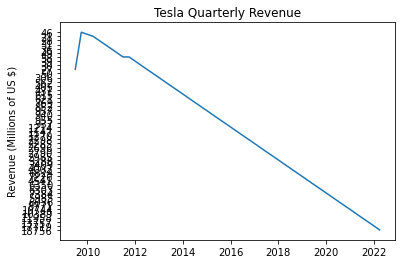

In [9]:
df = pd.DataFrame(columns=['Date', 'Revenue'])

for row in tables[my_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        Fecha = col[0].text
        Ingreso = col[1].text.replace("$", "").replace(",", "")
        df = df.append({"Date":Fecha, "Revenue":Ingreso}, ignore_index=True)

df = df[df['Revenue'] != ""] # elimino los datos nulos
print(df)
print(type(df))

records = df.to_records(index=False)
result = list(records)
#print(result)

connection = sqlite3.connect('Tesla.db')
cursor = connection.cursor()
cursor.execute('''CREATE TABLE IF NOT EXISTS revenue
             (Date, Revenue)''')

cursor.executemany('INSERT INTO revenue VALUES (?,?)', result)
connection.commit()
for x in cursor.execute('SELECT * FROM revenue'):
    print(x)

#df['Date'] = pd.to_datetime(df['Date'])   
#df["Date"] = df_rev["Date"].astype("datetime64")
#plt.plot(df['Date'],df['Revenue'])
#plt.savefig('books_read.png')


# Finally create a plot to visualize the data
df["Date"] = df["Date"].astype("datetime64")
#df = df.set_index("Date")

plt.figure()
plt.plot(df["Date"],df["Revenue"])
plt.title("Tesla Quarterly Revenue")
plt.ylabel("Revenue (Millions of US $)")
plt.savefig("Revenue.jpg")

